

## This notebook experiments on randomly selects 500 rows out of full dataset and run ML based on these data



In [1]:
import pandas as pd
import numpy as np

In [2]:
X_2house = pd.read_csv('/wgdisk/ho0338/ek79/Tien/X_2house_v0.csv')
X_2house=X_2house.drop(columns=['Unnamed: 0'])
X_2house.index.rename('Order', inplace=True)

In [3]:
y_2house = np.load('y_2house.npy')

### To randomly select samples out of full dataset

In [4]:
from random import sample
# create random index
rindex =  np.array(sample(range(len(X_2house)), 500))
print(rindex[0:10])
# get 10 random rows from df
X_2hrand = X_2house.iloc[rindex]

[2717095 3841422 1318455 3701363 2065018 1689140  979213 1066575  918178
  774372]


In [5]:
X_2hrand.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Screen Porch_2,Pool Area_2,Pool QC_2,Fence_2,Misc Feature_2,Misc Val_2,Mo Sold_2,Yr Sold_2,Sale Type_2,Sale Condition_2
Order,,,,,,,,,,,,,,,,,,,,,
2717095,20.0,4.0,95.0,19508.0,1.0,1.0,3.0,3.0,4.0,4.0,...,0.0,0.0,-1.0,4.0,0.0,0.0,12.0,2007.0,4.0,1.0
3841422,50.0,6.0,120.0,9000.0,1.0,1.0,3.0,3.0,4.0,0.0,...,153.0,0.0,-1.0,4.0,0.0,0.0,10.0,2007.0,4.0,1.0
1318455,60.0,4.0,0.0,24682.0,1.0,1.0,2.0,3.0,4.0,1.0,...,0.0,0.0,-1.0,4.0,0.0,0.0,6.0,2008.0,0.0,3.0
3701363,160.0,3.0,34.0,3230.0,1.0,2.0,3.0,3.0,4.0,0.0,...,0.0,0.0,-1.0,4.0,0.0,0.0,8.0,2006.0,4.0,1.0
2065018,20.0,4.0,79.0,10637.0,1.0,1.0,3.0,3.0,4.0,4.0,...,0.0,0.0,-1.0,1.0,0.0,0.0,1.0,2007.0,0.0,3.0


In [6]:
y_2rand=y_2house[rindex]

In [7]:
print('dimension of X_input:',X_2hrand.shape)
print('dimension of y_input:',y_2rand.shape)

dimension of X_input: (500, 158)
dimension of y_input: (500,)


### Set up the train-test split in sklearn

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_2hrand, y_2rand, test_size=0.5, random_state=12)

In [9]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(250, 158)
(250,)
(250, 158)
(250,)


In [10]:
from sklearn.ensemble import RandomForestRegressor
RD_RF_model0 = RandomForestRegressor(random_state=12,verbose=10)

In [11]:
RD_RF_model0.fit(X_train,y_train)

building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=12, verbose=10, warm_start=False)

In [12]:
pred_train = RD_RF_model0.predict(X_train)
print('training score of Linear Regression:',RD_RF_model0.score(X_train,pred_train))
pred_test=RD_RF_model0.predict(X_test)
print('testing score of Linear Regression:',RD_RF_model0.score(X_test,pred_test))

training score of Linear Regression: 1.0
testing score of Linear Regression: 1.0


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapse

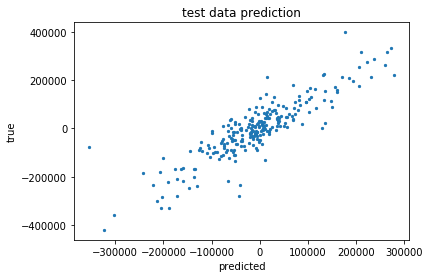

In [14]:
import matplotlib.pyplot as plt
plt.scatter(pred_test,y_test, s=5)
plt.title('test data prediction')
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()

In [15]:
from sklearn import metrics
print('MSE score(training):',metrics.mean_squared_error(y_train, pred_train))
print('MAE score(training):',metrics.mean_absolute_error(y_train, pred_train))
print('MSE score:',metrics.mean_squared_error(y_test, pred_test))
print('MAE score:',metrics.mean_absolute_error(y_test, pred_test))

MSE score(training): 676400481.549
MAE score(training): 18419.1864
MSE score: 3486534086.38
MAE score: 42440.0488


In [18]:
## save a defaultdict for the coef of each attribute:
weights=zip(list(X_2hrand.columns),RD_RF_model0.feature_importances_) # use a iterable to print the coefficient and their corresponding column name
m0_coef=dict(zip(X_2hrand.columns, RD_RF_model0.feature_importances_))

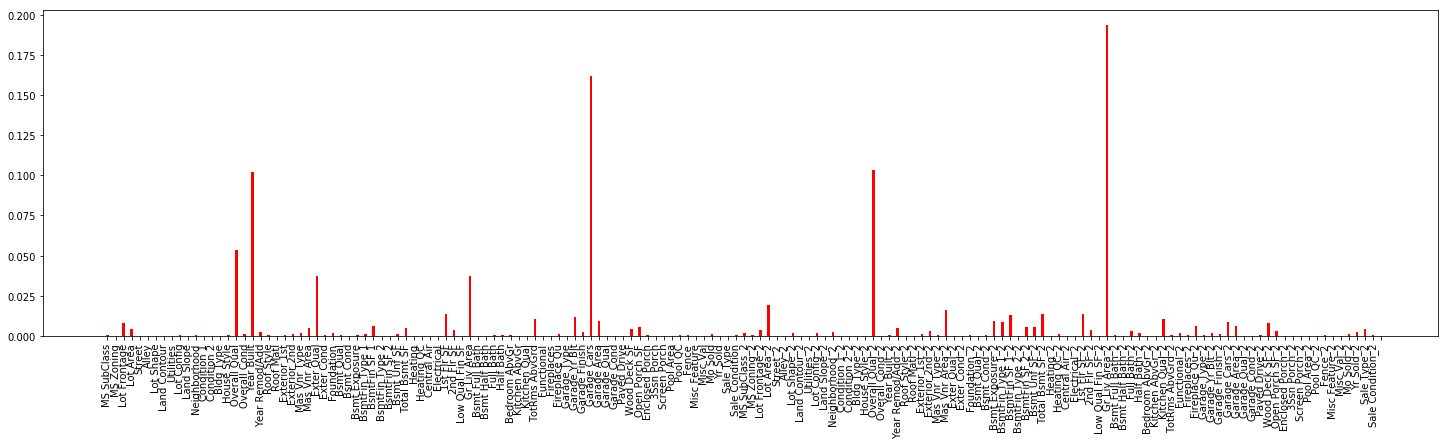

In [20]:
# plot a histogram chart to illustrate :

x_tick_label=list(X_2hrand.columns)
hist_val=RD_RF_model0.feature_importances_
fig, ax = plt.subplots(figsize=(25,6))
index=np.arange(len(RD_RF_model0.feature_importances_))
ax.bar(index,hist_val, .3, color='r')
ax.set_xticks(range(0, 159, 1))
ax.set_xticklabels(x_tick_label, rotation='vertical')
plt.show()

### Do cross-validation to check performance of this model

# import numpy as np
from sklearn.model_selection import KFold, cross_val_score
k_fold = KFold(n_splits=20)
k_fold.get_n_splits(X_train)
scores = np.sqrt(-1*cross_val_score(RD_RF_model0, X_train, y_train,verbose=10, cv=20,scoring = 'neg_mean_squared_error'))
print('Cross-validated scores:', scores)

In [24]:
from scipy import stats
stats.describe(scores)

DescribeResult(nobs=20, minmax=(38760.856795969979, 91599.22189882856), mean=61062.887732567076, variance=261952534.15814871, skewness=0.3945179417098979, kurtosis=-0.9373315040066461)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


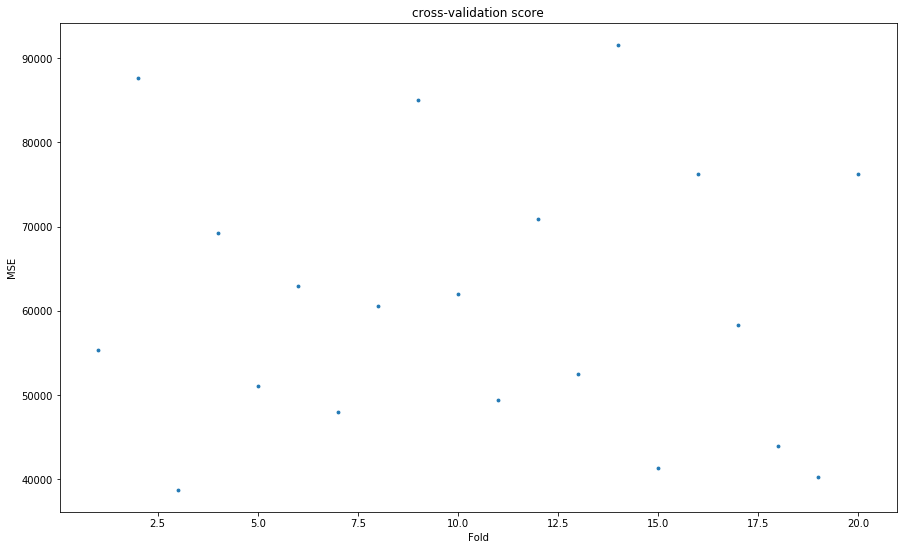

In [25]:
## Plot the variation of the cross-validation scores
stp=np.array([x for x in range(1,21)])
print(stp)
fig = plt.figure(figsize=(15,9))
ax = plt.gca()
ax.scatter(stp,scores,s=8)
plt.title('cross-validation score')
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.show()